In [7]:
import matplotlib.pyplot as plt
class Point():
    def __init__(self, x=None, y=None):
        self.x = x
        self.y = y
    
    def __repr__(self):
        return f'Point(x={self.x:.2f}, y={self.y:.2f})'
    
    def distEuclidean(self, other):
        return np.sqrt((self.x-other.x)**2 + (self.y-other.y)**2)
    
    def __eq__(self, other): 
        if not isinstance(other, Point):
            return NotImplemented
        return self.x == other.x and self.y == other.y

class Segment():    
    def __init__(self, p0, p1):
        self.start = p0
        self.end = p1
        self.length = p0.distEuclidean(p1)
    
    def __repr__(self):
        return f'Segment with start {self.start} and end {self.end}.' 

class Bbox():    
    def __init__(self, data):
        if isinstance(data, Segment):
            x = [data.start.x, data.end.x]
            y = [data.start.y, data.end.y]
        else:      
            x = [i.x for i in data]
            y = [i.y for i in data]
        self.ll = Point(min(x), min(y))
        self.ur = Point(max(x), max(y))
        self.ctr = Point((max(x)-min(x))/2, (max(y)-min(y))/2)
        self.area = (abs(max(x)-min(x)))*abs((max(y)-min(y)))    
           
    def containsPoint(self, p):
        if (self.ur.x >= p.x and p.x >= self.ll.x and
            self.ur.y >= p.y and p.y >= self.ll.y):
            return True
        return False

    def intersects(self, other):       
        if (self.ur.x > other.ll.x and other.ur.x > self.ll.x and
            self.ur.y > other.ll.y and other.ur.y > self.ll.y):
            return True
        else:
            return False

class Polygon():  
    def __init__(self, data=None, xcol=None, ycol=None):
        self.points = []
        if isinstance(data[0], Point):
            self.points = data
        else:
            for d in data:
                self.points.append(Point(d[xcol], d[ycol]))
        self.size = len(self.points)
        self.bbox = Bbox(self.points)
        
    def __repr__(self):
        return f'Polygon PointGroup containing {self.size} points' 

    def get_points(self):
        return self.points
    
    def intersects(self, other):
        if not self.bbox.intersects(other.bbox):
            return False
        
        for i in range(len(self.points) - 1):
            for j in range(len(other.points) - 1):
                if self.segments_intersect(Segment(self.points[i], self.points[i + 1]), Segment(other.points[j], other.points[j + 1])):
                    return True
        return False
    
    def segments_intersect(self, seg1, seg2):
        def ccw(A, B, C):
            return (C.y - A.y) * (B.x - A.x) > (B.y - A.y) * (C.x - A.x)
        
        A, B = seg1.start, seg1.end
        C, D = seg2.start, seg2.end
        
        return ccw(A, C, D) != ccw(B, C, D) and ccw(A, B, C) != ccw(A, B, D)
    
    def union(self, other):
        new_points = self.points[:-1] + other.points[:-1]
        new_polygon = Polygon(data=new_points, xcol=0, ycol=1)
        return new_polygon

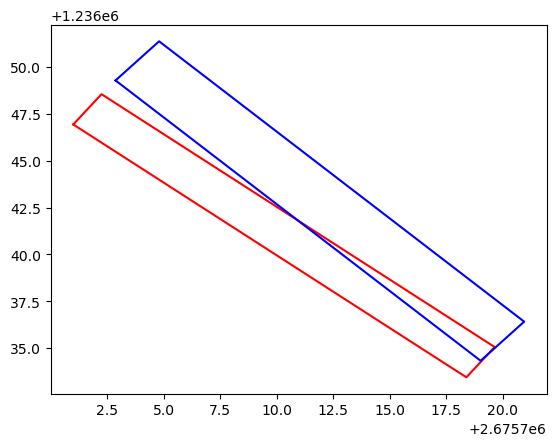

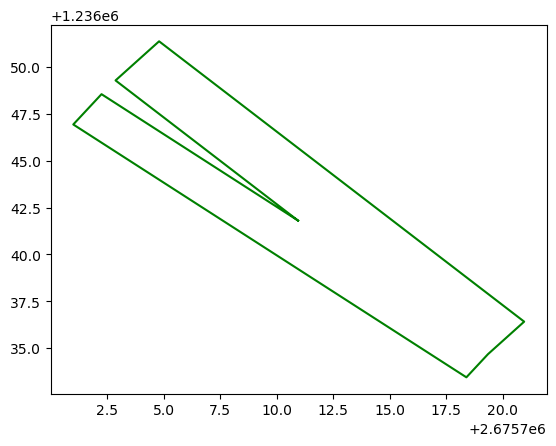

In [18]:
poly1 = Polygon([[2675701.000217317, 1236046.927423282], [2675702.2502173167, 1236048.541423285], [2675719.6437827665, 1236035.07057027], [2675718.393782767, 1236033.4565702672], [2675701.000217317, 1236046.927423282]], 0, 1)
poly2 = Polygon([[2675702.870554051, 1236049.2739965203], [2675704.797554052, 1236051.3579965162], [2675720.9504460334, 1236036.4219970305], [2675719.0234460323, 1236034.3379970347], [2675702.870554051, 1236049.2739965203]], 0, 1)
poly3 = Polygon([[2675710.947000047, 1236041.8059967752], [2675702.870554051, 1236049.2739965203], [2675702.870554051, 1236049.2739965203], [2675704.797554052, 1236051.3579965162], [2675720.9504460334, 1236036.4219970305], [2675719.349612024, 1236034.6907370037], [2675718.393782767, 1236033.4565702672], [2675701.000217317, 1236046.927423282], [2675702.2502173167, 1236048.541423285], [2675710.947000047, 1236041.8059967752]],0,1)

plt.plot([i.x for i in poly1.points], [i.y for i in poly1.points], 'r-')

plt.plot([i.x for i in poly2.points], [i.y for i in poly2.points], 'b-')
plt.figure(2)
plt.plot([i.x for i in poly3.points], [i.y for i in poly3.points], 'g-')
plt.show()